# Trabalho prático de SIB

# Notebook 1

## Classificação de Proteínas - Binary classification of protein SNAREs

Gupo 5 | Joana Gabriel pg42870; Maria Couto pg44380 ; Sara Boaventura pg44381

### Etapa 1 - Exploração Inicial e Pré-processamento


### Descrição e caracterização dos dados atribuídos de acordo com a documentação/literatura

SNAREs (soluble N-ethylmaleimide-sensitive factor activating receptors) são um grupo de proteínas que são cruciais para a fusão de membranas e exocitose de neurotransmissores, também estão envolvidas no crecimento celular, citocinese e transmisões sinápticas.

São proteínas associadas à membrana que podem ser distinguidas de acordo com os domínios SNARE. A maiorias das proteínas SNAREs tem o SNARE motif adjacente a uma única membrana C-terminal. 

De um modo geral tem um dominio SNARE central com um dominio N-terminal variável e um C-terminal correspondente a uma ancora transmembranar de hélice alpha.

Os dados que nos foram atribuídos foram retirados do NCBI, que foram depois analisados de modo a não ter redundância nos dados.
Os dados correspondem a 26.789 sequencias de proteínas SNAREs e, de modo a facilitar os problemas de Machine Learning foram retiradas aleatóriamente o mesmo número de sequencias mas desta vez de proteínas que não são SNAREs.

Os dados foram recolhidos de modo a poderem ser analisados como um cado de classificação binária entre um grupo positivo (o das SNAREs) e um negativo (o das non_SNAREs).

Os dados estão organizados em 4 ficheiros:
* *snare.cv* : contem 22.324 sequencias de SNAREs resultantes de validação cruzada dos dados pré-processados
* *snare.ind* : contem 4.465 sequencias de SNAREs
* *non_snare.cv* : contem 22.324 sequencias de não SNAREs resultantes de validação cruzada dos dados pré-processados
* *non_snare.ind* : contem 4.465 sequencias de não SNAREs



### Análise exploratória inicial

In [1]:
import sklearn
import pandas as pd
import re
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from Bio import SeqIO
from Bio.Data import IUPACData
import matplotlib.pyplot as plt

In [2]:
# Criacao dum dicionario com o ID da sequencia como chave e a sequencia como valor  
non_snare_cv_seqs = {}
for seq_record in SeqIO.parse("non_snare_cv.fasta","fasta"):
    name, sequence = seq_record.id, seq_record.seq
    non_snare_cv_seqs[name] = sequence
#print(non_snare_cv_seqs)

In [3]:
# Criacao dum dicionario com o ID da sequencia como chave e a sequencia como valor 
snare_cv_seqs = {}
for seq_record in SeqIO.parse("snare_cv.fasta","fasta"):
    name, sequence = seq_record.id, seq_record.seq
    snare_cv_seqs[name] = sequence
#print(snare_cv_seqs)

In [4]:
# Criacao dum dicionario com o ID da sequencia como chave e a sequencia como valor 
non_snare_ind_seqs = {}
for seq_record in SeqIO.parse("non_snare_ind.fasta","fasta"):
    name, sequence = seq_record.id, seq_record.seq
    non_snare_ind_seqs[name] = sequence
#print(non_snare_ind_seqs)

In [5]:
# Criacao dum dicionario com o ID da sequencia como chave e a sequencia como valor 
snare_ind_seqs = {}
for seq_record in SeqIO.parse("snare_ind.fasta","fasta"):
    name, sequence = seq_record.id, seq_record.seq
    snare_ind_seqs[name] = sequence
#print(snare_ind_seqs)

In [6]:
# Numero de sequencias nos ficheiros 
print(len(snare_ind_seqs.keys()))
print(len(snare_cv_seqs.keys()))
print(len(non_snare_ind_seqs.keys()))
print(len(non_snare_cv_seqs.keys()))

4465
22324
4465
22324


De acordo com esta informação conseguimos confirmar que o número de sequências em cada ficheiro é o que está descrito na literatura.

In [7]:
# Funcao que da a sequencia mais longa no ficheiro e faz print do respetivo nome e tamanho
def seq_length(dici, tam):
    """
    dici: {seq_id: sequence} 
    tam: if s, prints the seq_id of the shortest seq and it's len
        if l, prints the seq_id of the longest seq and it's len
    """
    myList = []
    for seq in dici.items():
        myList.append([seq[0], str(seq[1]), len(str(seq[1]))])
    myList.sort(key=lambda x: x[2])
    if tam == 'l':
        print("The longest sequence is: ",  myList[-1][0], ' with the length of ', myList[-1][2])
    else:
        print("The shortest sequence is: ",  myList[0][0], ' with the length of ', myList[0][2]) 
    

In [8]:
# Sequencia mais longa e respetivo tamanho 
seq_length(snare_ind_seqs, 'l')
seq_length(snare_cv_seqs, 'l')
seq_length(non_snare_ind_seqs, 'l')
seq_length(non_snare_cv_seqs, 'l')

The longest sequence is:  XP_023420465.1  with the length of  4836
The longest sequence is:  WP_077804900.1  with the length of  3916
The longest sequence is:  NP_001367.2  with the length of  4646
The longest sequence is:  NP_001026.2  with the length of  4967


A sequencia mais longa do conjunto de dados non_snare.cv pertence à proteina humana ryanodine receptor 2, com o id *NP_001026.2* e um tamanho total de 4967 aminoácidos. A sequencia mais longa do conjunto de dados non_snare_ind pertence à proteina humana cytoplasmic dynein 1 heavy chain 1, com o id *NP_001367.2*. A sequencia mais longa do conjunto de dados snare.cv pertence à proteina YSIRK-type signal peptide-containing protein da especie Streptococcus mitis, com o id *WP_077804900.1*. A sequencia mais longa do conjunto de dados snare_ind pertence à proteina LOW QUALITY PROTEIN: dynein heavy chain 14, axonemal da espécie Cavia porcellus, com o id *XP_023420465.1* .

In [9]:
# Sequencia mais curta no ficheiro e respetivo tamanho 
seq_length(snare_ind_seqs, 's')
seq_length(snare_cv_seqs, 's')
seq_length(non_snare_ind_seqs, 's')
seq_length(non_snare_cv_seqs, 's')

The shortest sequence is:  XP_010198571.1  with the length of  47
The shortest sequence is:  XP_012897290.1  with the length of  37
The shortest sequence is:  YP_009349977.1  with the length of  52
The shortest sequence is:  YP_009535751.1  with the length of  50


A sequencia mais pequena do conjunto de dados snares_ind, com o id *XP_010198571.1* é uma porção de uma proteína associada às membranas de vesículas com um tamanho de 47 aa. A sequencia mais pequena do conjunto de dados snares_cv, com o id *XP_012897290.1* é uma sequencia não identificada associada a blastocistos, com um tamanho de 37 aa. A sequencia mais pequena das non_snares_ind, tem o id *YP_009349977.1*, um tamanho de 52 aa e está associada à ATP synthase F0 subunidade 8. E a sequencia mais pequena das non_snares_cv, com o id *YP_009535751.1* e um tamanho de 50 aa corresponde à mesma que a anterior mas de um organismo diferente.

In [10]:
# Quantidade de aminoacidos (aa) em cada ficheiro
def aa (dici):
    dataframe = {}
    for seq_record in dici.items():
        amino={}
        for aa in seq_record[1]:
            if aa not in amino:
                amino[aa] = 0
            amino[aa] += 1
        dataframe[seq_record[0]]=amino
    df = pd.DataFrame(dataframe)
    return df

<AxesSubplot:>

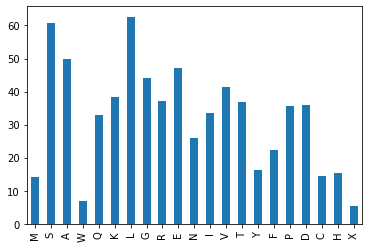

In [11]:
# Data frame dos aa de cada sequencia de snare_ind_seqs 
df_snare_ind_seqs = aa(snare_ind_seqs)

# Grafico que tem em conta todas as sequencias e faz uma media de cada aa nas snares_ind
df_snare_ind_seqs["mean"] = df_snare_ind_seqs.mean(axis=1)

df_snare_ind_seqs['mean'].plot(kind='bar',x=df_snare_ind_seqs.index)

Ao conseguirmos ver quantos e quais os aminoacidos em cada sequencia pordemos ver que as snares_ind não contem apenas nomenclatura IUPAC, podemos ver que tem tambem o caracter X. Na fase de pré-processamento para analisar as features teremos de retirar estes caracteres. Podemos tambem observar que os aa mais encontrados são Serinas (S) e Leucinas (L). E o que aparecer em menor quantidade é o Triptofano (W)

<AxesSubplot:>

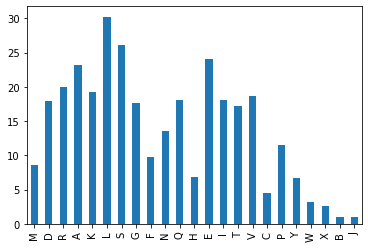

In [12]:
# Data frame dos aa de cada sequencia de snare_cv_seqs
df_snare_cv_seqs = aa(snare_cv_seqs)

# Grafico que tem em conta todas as sequencias e faz uma media de cada aa nas snares_cv
df_snare_cv_seqs["mean"] = df_snare_cv_seqs.mean(axis=1)

df_snare_cv_seqs['mean'].plot(kind='bar',x=df_snare_cv_seqs.index)

Com este ficheiro (snares_cv) podemos ver que acontece o mesmo com o anterior, mas desta vez temos os caracteres X, B e J. Podemos também observar que os aa mais encontrados são Serinas (S) e Leucinas (L). E o que aparece em menor quantidade é o Triptofano (W), tal como no ficheiro das snares_ind.

<AxesSubplot:>

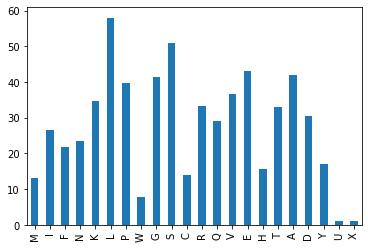

In [13]:
# Data frame dos aa de cada sequencia dos non_snare_ind_seqs 
df_non_snare_ind_seqs = aa(non_snare_ind_seqs)
# Grafico que tem em conta todas as sequencias e faz uma media de cada aa nas non_snares_ind
df_non_snare_ind_seqs["mean"] = df_non_snare_ind_seqs.mean(axis=1)

df_non_snare_ind_seqs['mean'].plot(kind='bar',x=df_non_snare_ind_seqs.index)

Com este ficheiro (non_snares_ind) acontece o mesmo mas com os caracteres U e X. Podemos tambem observar que os aa mais encontrados são Serinas (S) e Leucinas (L). E o que aparecer em menor quantidade é o Triptofano (W), Tal como nos ficheiros das snares.

In [ ]:
# Data frame of the aa in wich seq of the non_snare_cv_seqs
df_non_snare_cv_seqs = aa(non_snare_cv_seqs)

# Grafico que tem em conta todas as sequencias e faz uma media de cada aa nas non_snares_cv
df_non_snare_cv_seqs["mean"] = df_non_snare_cv_seqs.mean(axis=1)

df_non_snare_cv_seqs['mean'].plot(kind='bar',x=df_non_snare_cv_seqs.index)

Com este ficheiro (non_snares_cv) acontece o mesmo mas com os caracteres U e X. O pré processamento destas sequências terá de ser realizado antes de fazer a análise das features. Podemos também observar que os aa mais encontrados são Serinas (S) e Leucinas (L). E o que aparece em menor quantidade é o Triptofano (W), tal como em todos os outros ficheiros.

Segundos estes gráficos, não podemos concluir que o que destingue uma proteína SNARE de uma NON_SNARE seja a sua composição em aminoácidos.

Antes de fazer esse pré-processamento vamos transformar a sequência num vetor numérico com one hot encoding, de modo a termos mais uma forma de analisar as sequências.

In [ ]:
# Transformar as sequencias em one hot encoding 
def to_one_hot_encoding(file, filetype):
    seqs= []
    for seq_record in SeqIO.parse(file,filetype):
        name, sequence = seq_record.id, seq_record.seq

        #get sequence into an array
        seq_array = array(list(sequence))

        #integer encode the sequence
        label_encoder = LabelEncoder()
        integer_encoded_seq = label_encoder.fit_transform(seq_array)

        #sequencia one hot
        onehot_encoder = OneHotEncoder(sparse=False)    


        integer_encoded_seq = integer_encoded_seq.reshape(len(integer_encoded_seq), 1)
        onehot_encoded_seq = onehot_encoder.fit_transform(integer_encoded_seq)

        seqs.append([name, onehot_encoded_seq])
    return seqs

In [ ]:
to_one_hot_encoding("non_snare_cv.fasta", 'fasta')
to_one_hot_encoding("non_snare_ind.fasta", 'fasta')
to_one_hot_encoding("snare_cv.fasta", 'fasta')
to_one_hot_encoding("snare_ind.fasta", 'fasta')

### Pré-Processamento Snare_ind

De modo a processar os dados para não ter caracteres estranhos para a análise dos fatores físico-químicos, segue-se o código abaixo:

In [ ]:
# Retirar os caracteres estranhos das sequencias, usando a nomenclatura IUPAC
seq = snare_ind_seqs.items()
snare_ind_seqs_r = {}
for s in seq:
    sequencia = ''
    for aa in str(s[1]):
        if aa in IUPACData.protein_letters:
            sequencia += aa
        if len(sequencia) == len(str(s[1])):
            snare_ind_seqs_r[s[0]] = sequencia
print("Existiam ", str(len(snare_ind_seqs)-len(snare_ind_seqs_r)) ," sequências que nao tinham apenas as letras IUPAC.")

In [ ]:
from propythia.descriptors import Descriptor
from propythia.sequence import ReadSequence

In [ ]:
# Calculo das features para cada ficheiro
def calculate_feature(data):
    list_feature = []
    seq = data.items()
    for s in seq:
        res = {'sequence': str(s[1])}
        sequence = ReadSequence()  # creating sequence object
        ps = sequence.read_protein_sequence(str(s[1]))
        protein = Descriptor(ps)  # creating object to calculate descriptors
        feature = protein.adaptable([19, 20, 21, 24, 26, 32], lamda_paac=4, lamda_apaac=4)
        # feature = protein.get_all(lamda_paac=5, lamda_apaac=5) #minimal seq len = 5
        # lambda should not be larger than len(sequence)
        res.update(feature)
        list_feature.append(res)
    print('saving features')
    df = pd.DataFrame(list_feature)
    return df

snare_ind_features = calculate_feature(snare_ind_seqs_r) # calculo das features

In [ ]:
snare_ind_features.to_csv('snare_ind_feature.csv', index = False) # guardar o ficheiro com as features num ficheiro .csv

De modo a facilitar a utilização do código, devido ao tempo de processamento para o cálculo das features, correu-se o código uma vez e a partir de agora iremos ler os ficheiros .csv

In [ ]:
snare_ind_feature = pd.read_csv('snare_ind_feature.csv', low_memory = False) #data frame com as features das snares_ind

In [ ]:
snare_ind_feature.describe() #sumario das caracteristicas fisico-quimicas das snares_ind

Com a análise deste sumário podemos ver que o comprimento médio das sequencias snares_ind é cerca de 658 aa, que a média das cargas é negativa (-6.786, o mesmo acontecendo com a densidade da carga.

In [ ]:
boxplot_snares_len = snare_ind_feature.boxplot(column=['lenght'])
boxplot_snares_len.plot()
plt.show()

snare_ind_feature.iloc[:,[1]].hist(bins=20)

Com a análise destes dois gráficos do comprimento das sequncias podemos verificar que a maioria das sequências não ultrapassa os 2000 aa. 

In [ ]:
boxplot_snares_ch = snare_ind_feature.boxplot(column=['charge'])
boxplot_snares_ch.plot()
plt.show()

snare_ind_feature.iloc[:,[2]].hist()

Com o boxplot da carga, podemos verificar que os valores das cargas das sequências são muito variáveis, isto é comprovado pela grande quantidade de outliers presentes no gráfico. Pelo histograma conseguimos verificar que é entre a carga 0 e 25 que se encontra o maior número de sequências.

### Pré-processamento Snares_cv

In [ ]:
# Retirar os caracteres estranhos das sequencias, usando a nomenclatura IUPAC
seq= snare_cv_seqs.items()
snare_cv_seqs_r = {}
for s in seq:
    sequencia = ''
    for aa in str(s[1]):
        if aa in IUPACData.protein_letters:
            sequencia += aa
        if len(sequencia) == len(str(s[1])):
            snare_cv_seqs_r[s[0]] = sequencia
            
print("Existiam ", str(len(snare_cv_seqs)-len(snare_cv_seqs_r)) ," sequencias que nao tinham apenas as letras IUPAC")

In [ ]:
from Features import Calc_feature

In [ ]:
# Criaçao de um df para ser posssivel fazer o calculo das features
df_snare_cv = pd.DataFrame(list(snare_cv_seqs_r.items()),columns = ['id','sequence']) 

In [ ]:
# Calculo das features para o ficheiro snares_cv
fea = Calc_feature(df_snare_cv.iloc[:,:],'sequence',[19,20,21,24,26,32], "snare_cv_feature.csv")
fea.run()
fea.toDataframe()

In [ ]:
# De modo a facilitar o uso dos dados, a função anterior guardou num ficheiro .csv os resultados do calculo das features e agora
# Podemos apenas ler esse ficheiro
snare_cv_feature = pd.read_csv('snare_cv_feature.csv', low_memory = False)

In [ ]:
#retiramos a primeira coluna que tinha informação repetida
snare_cv_feature = snare_cv_feature.loc[:,snare_cv_feature.columns[1:]]

In [ ]:
snare_cv_feature.describe() #sumario das caracteristicas fisico-quimicas das snares_ind

Com a análise deste sumário podemos ver que o comprimento médio das sequências snares_cv é cerca de 312 aa, que a média das cargas é negativa (-2.338912), o mesmo acontecendo com a densidade da carga. 

In [ ]:
boxplot_snares_cv_len = snare_cv_feature.boxplot(column=['lenght'])
boxplot_snares_cv_len.plot()
plt.show()

snare_cv_feature.iloc[:,[1]].hist(bins=20)

Com a análise dos dois gráficos conseguimos perceber que a maioria das sequências snares_cv não ultrapassa o 1500 aa, estando a maioria entre cerca dos 200 a 500 aa. 

In [ ]:
boxplot_snares_cv_ch = snare_cv_feature.boxplot(column=['charge'])
boxplot_snares_cv_ch.plot()
plt.show()

snare_cv_feature.iloc[:,[2]].hist()

Com a análise destes dois gráficos podemos reparar que a carga da maioria destas sequências snares encontra-se muito perto de 0, mais precisamente entre cerca de -25 a +25

###  Pré-processamento Non-Snares_ind

In [ ]:
# Retirar os caracteres estranhos das sequencias, usando a nomenclatura IUPAC
seq= non_snare_ind_seqs.items()
non_snare_ind_seqs_r = {}
for s in seq:
    sequencia = ''
    for aa in str(s[1]):
        if aa in IUPACData.protein_letters:
            sequencia += aa
        if len(sequencia) == len(str(s[1])):
            non_snare_ind_seqs_r[s[0]] = sequencia
            
print("Existiam ", str(len(non_snare_ind_seqs)-len(non_snare_ind_seqs_r)) ," sequencias que nao tinham apenas as letras IUPAC")

In [ ]:
# Ccalculo das features
non_snare_ind_features = calculate_feature(non_snare_ind_seqs_r)

In [ ]:
# Guardar o df do calculo das features num ficheiro .csv para ser mais fácil fazer as proximas analises, assim so teremos
# Importar o ficheiro resultante
non_snare_ind_features.to_csv('non_snare_ind_feature.csv', index = False)

In [ ]:
# Importe do ficheiro .csv do calculo das features para um df
non_snare_ind_feature = pd.read_csv('non_snare_ind_feature.csv', low_memory = False)

In [ ]:
non_snare_ind_feature.describe() # sumário das caracteristicas fisico-quimicas das non_snares_ind

Com a análise deste sumário podemos ver que o comprimento médio das sequências non_snares_ind é cerca de 613 aa, que a média das cargas é negativa (-4.837536), o mesmo acontecendo com a densidade da carga.

In [ ]:
boxplot_non_snares_ind_len = non_snare_ind_feature.boxplot(column=['lenght'])
boxplot_non_snares_ind_len.plot()
plt.show()

non_snare_ind_feature.iloc[:,[1]].hist(bins=20)

Com a análise destes gráficos podemos ver que a maioria das sequências tem um comprimento inferior a cerca de 1500 aa.

In [ ]:
# Graficos da distribuicao da carga das sequencias
boxplot_non_snares_ind_ch = non_snare_ind_feature.boxplot(column=['charge'])
boxplot_non_snares_ind_ch.plot()
plt.show()

non_snare_ind_feature.iloc[:,[2]].hist()

Com a análise destes dois gráficos, que representam a distribuição da carga das sequências non_snares_ind podemos verificar que a maioria encontra-se entre cerca dos -50 a 50 e a média esta um pouco acima de zero. No entanto, existem sequências com uma carga de cerca de -300.

### Pré-processamento Non_Snares_cv

In [ ]:
# Retirar os caracteres estranhos das sequencias, usando a nomenclatura IUPAC
seq= non_snare_cv_seqs.items()
non_snare_cv_seqs_r = {}
for s in seq:
    sequencia = ''
    for aa in str(s[1]):
        if aa in IUPACData.protein_letters:
            sequencia += aa
        if len(sequencia) == len(str(s[1])):
            non_snare_cv_seqs_r[s[0]] = sequencia
            
print("Existiam ", str(len(non_snare_cv_seqs)-len(non_snare_cv_seqs_r)) ," sequencias que nao tinham apenas as letras IUPAC")

In [ ]:
# Data frame necessário para o calculo das features
df_non_snare_cv = pd.DataFrame(list(non_snare_cv_seqs_r.items()),columns = ['id','sequence']) 

In [ ]:
# Calculo das fetaures e guardar o resultado num ficheiro .csv
fea2 = Calc_feature(df_non_snare_cv.iloc[:,:],'sequence',[19,20,21,24,26,32], "non_snare_cv_feature.csv")
fea2.run()
fea2.toDataframe()

In [ ]:
# Importe do calculo das features
non_snare_cv_feature = pd.read_csv('non_snare_cv_feature.csv', low_memory = False)
#retiramos a primeira coluna que tinha informação repetida
non_snare_cv_feature = non_snare_cv_feature.loc[:,non_snare_cv_feature.columns[1:]]

In [ ]:
non_snare_cv_feature.describe() # sumário das caracteristicas fisico-quimicas das non_snares_ind

Com a análise deste sumário podemos ver que o comprimento médio das sequências non_snares_cv é cerca de 561 aa, que a média das cargas é negativa (-3.631568), o mesmo acontecendo com a densidade da carga.

In [ ]:
# Graficos da distribuicao do tamanho das sequencias non_snares_cv
boxplot_non_snares_cv_len = non_snare_cv_feature.boxplot(column=['lenght'])
boxplot_non_snares_cv_len.plot()
plt.show()

non_snare_cv_feature.iloc[:,[1]].hist(bins=20)

Com a análise destes gráficos podemos ver que a maioria das sequências apresenta um tamanho que nao ultrapassa os 2000 aa. No entanto pelo boxplot podemos ver que existem algumas sequências que ultrapassam esse valor, chegando mesmo aos 5000 aa.

In [ ]:
# Graficos da distibuicao da carga das sequencias
boxplot_non_snares_cv_ch = non_snare_cv_feature.boxplot(column=['charge'])
boxplot_non_snares_cv_ch.plot()
plt.show()

non_snare_cv_feature.iloc[:,[2]].hist()

Com a análise destes gráficos podemos verificar que a maioria das sequências entra-se entre cerca de -100 e 100. Através do boxplot podemos ver que a maioria é mesmo negativa, existindo no entanto uma sequência com uma carga superior a 400.

Já que os gráficos não nos davam muita informação em relação à carga das sequências, principalmente por existir uma boa divisao entre positivas e negativas, resolvemos analisar a média de todos os ficheiros, separando as sequências positivas das negativas.

In [ ]:
# Media da carga das sequencias non_snare_cv positivas
print(non_snare_cv_feature.loc[non_snare_cv_feature['charge']>=0,'charge'].mean())
# Media da carga das sequencias non_snare_cv negativas
print(non_snare_cv_feature.loc[non_snare_cv_feature['charge']<0,'charge'].mean())

In [ ]:
# Media da carga das sequencias non_snare_ind positivas
print(non_snare_ind_feature.loc[non_snare_ind_feature['charge']>=0,'charge'].mean())
# Media da carga das sequencias non_snare_ind negativas
print(non_snare_ind_feature.loc[non_snare_ind_feature['charge']<0,'charge'].mean())

Em relação às cargas das non_snares, podemos ver que ao comparar os dois ficheiros as cargas não são muito diferentes umas das outras (ao comparar positivas com positivas e negativas com negativas).

In [ ]:
# Media da carga das sequencias snare_ind positivas
print(snare_ind_feature.loc[snare_ind_feature['charge']>=0,'charge'].mean())
# Media da carga das sequencias snare_ind negativas
print(snare_ind_feature.loc[snare_ind_feature['charge']<0,'charge'].mean())

In [ ]:
# Media da carga das sequencias snare_cv positivas
print(snare_cv_feature.loc[snare_cv_feature['charge']>=0,'charge'].mean())
# Media da carga das sequencias snare_cv negativas
print(snare_cv_feature.loc[snare_cv_feature['charge']<0,'charge'].mean())

Em relação às snares já não podemos concluir que são parecidas entre si, principalmente porque nas negativas apresenta uma diferença de 10. Ao tentarmos comparar as snares com as non_snares fica complicado pois se formos comparar com as snares_ind, os valores não variam muito. Se compararmos com as snares_cv estes valores já são diferentes.


## Juntar os datasets de ind para o teste e os de cv para o treino (para passos futuros)

Junção dos dataframes independentes que serão utilizados para testar posteriormente os modelos:

In [ ]:
# Comecamos por criar uma varivel label em que 1 representa sequencias snare e 0 sequencias non snare
snare_ind_feature['label'] = 1
non_snare_ind_feature['label'] = 0

In [ ]:
print(snare_ind_feature.shape)
print(non_snare_ind_feature.shape)

Em relação ao shape destes datasets, os primeiros valores correspondem ao número de sequências que se encontra em cada ficheiro, ou seja o snare_ind_feature tem 4386 sequências e o non_snare_ind_feature 4403 sequências. O segundo número corresponde à primeira coluna que tem a sequência, a última que tem a variavel label e as 640 features calculadas.

In [ ]:
# Juncao dos dois dataframes
dataset = pd.concat([snare_ind_feature, non_snare_ind_feature])

In [ ]:
# Guardamos a variavel label numa nova variavel e retiramos esta variavel do dataset
labels = dataset['label']
dataset = dataset.loc[:, dataset.columns != 'label']

In [ ]:
df = dataset.loc[:,dataset.columns[1:]] # como na proxima etapa nao sera necessario a sequencia retiramos do dataset
df

Aqui podemos verificar que só existem as 640 colunas correspodentes às features, pois foram retiradas as colunas dos labels e com a sequência.

Realizámos os passos anteriores mas para os dados de cross-validation que serão usados para treino:

In [ ]:
# Comecamos por criar uma varivel label em que 1 representa sequencias snare e 0 sequencias non snare
snare_cv_feature['label'] = 1
non_snare_cv_feature['label'] = 0

In [ ]:
print(snare_cv_feature.shape)
print(non_snare_cv_feature.shape)

Em relação ao shape destes datasets, os primeiros valores correspondem ao número de sequencias que se encontra em cada ficheiro, ou seja o snare_cv_feature tem 21947 sequências e o non_snare_cv_feature 22221 sequências. O segundo número corresponde à primeira coluna que tem a sequência, a última que tem a variável label e as 640 features calculadas.

In [ ]:
# Juncao dos dois dataframes
dataset2 = pd.concat([snare_cv_feature, non_snare_cv_feature])

In [ ]:
# Guardamos a variavel label numa nova variavel e retiramos esta variavel do dataset
labels2 = dataset2['label']
dataset2= dataset2.loc[:, dataset2.columns != 'label']

In [ ]:
df2 = dataset2.loc[:,dataset2.columns[1:]]  # como na proxima etapa nao sera necessario a sequencia retiramos do dataset
df2

Aqui podemos verificar que só existem as 640 colunas correspodentes às features, pois foram retiradas as colunas dos labels e com a sequência.